# Project Report: Classification of Star Types Using Machine Learning

##Analysis Objective

The goal of this project is to predict star types based on their characteristics such as temperature, luminosity, and radius using a machine learning model. Star classification is essential in astronomy as it helps understand the processes of star formation and evolution. By accurately classifying stars, we gain valuable insights into the universe and contribute to the study of their physical properties. This project aims to develop a predictive model that will assist in analyzing and classifying new star data, providing useful tools for future astronomical research and advancements.

## Dataset Information
This CSV file contains a dataset of 240 stars classified into 6 types:

- Brown Dwarf (Star Type = 0)
- Red Dwarf (Star Type = 1)
- White Dwarf (Star Type = 2)
- Main Sequence (Star Type = 3)
- Supergiant (Star Type = 4)
- Hypergiant (Star Type = 5)

## The luminosity and radius of each star are calculated with respect to the values of the Sun:

- Luminosity of Sun (Lo) = 3.828 x 10^26 Watts
- Radius of Sun (Ro) = 6.9551 x 10^8 meters

## Data Understanding and Exploration

The dataset is provided in CSV format, with each row representing information about a single star.

## Column Descriptions:

- Temperature (K): The surface temperature of the star in Kelvin.
- Luminosity (L/Lo): The luminosity of the star relative to the Sun.
- Radius (R/Rsun): The radius of the star relative to the Sun's radius.
- Absolute Magnitude (Mv): The absolute magnitude, indicating the intrinsic brightness of the star.
- Star Type: The type of the star, with possible values:
 - 0: Brown Dwarf
 - 1: Red Dwarf
 - 2: White Dwarf
 - 3: Main Sequence
 - 4: Supergiant
 - 5: Hypergiant

- Star Color: The color of the star (e.g., Red, Blue, Yellow, etc.).
- Spectral Class: The spectral classification of the star (e.g., O, B, A, F, G, K, M).

## Data Characteristics:

- There is likely a relationship between temperature, luminosity, and radius.
- The 'Star Type' column represents the classification we aim to predict.

## Data Preprocessing and Visualization
Before modeling, we performed several preprocessing steps:

- Label Encoding: Categorical variables such as Star Color and Spectral Class were encoded into numerical values using LabelEncoder.
- Data Normalization: Feature scaling was done using StandardScaler to standardize the data.

We also visualized the data using pair plots to understand the distribution and relationships between features.

## Modeling Approach
Two machine learning models were used in this analysis: Random Forest and K-Nearest Neighbors (KNN).

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE
from collections import Counter
import xgboost as xgb

In [86]:
# Load the data
data = pd.read_csv('6 class csv.csv')

In [87]:
# Exploratory Data Analysis (EDA)
print(data.head())
print(data.info())
print(data.describe())

   Temperature (K)  Luminosity(L/Lo)  Radius(R/Ro)  Absolute magnitude(Mv)  \
0             3068          0.002400        0.1700                   16.12   
1             3042          0.000500        0.1542                   16.60   
2             2600          0.000300        0.1020                   18.70   
3             2800          0.000200        0.1600                   16.65   
4             1939          0.000138        0.1030                   20.06   

   Star type Star color Spectral Class  
0          0        Red              M  
1          0        Red              M  
2          0        Red              M  
3          0        Red              M  
4          0        Red              M  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo) 

In [88]:
# Label encoding for categorical variables 'Star color' and 'Spectral Class'
label_encoder = LabelEncoder()
data['Star color'] = label_encoder.fit_transform(data['Star color'])
data['Spectral Class'] = label_encoder.fit_transform(data['Spectral Class'])

In [89]:
# Feature normalization (applying StandardScaler to numerical variables)
scaler = StandardScaler()
numeric_columns = ['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute magnitude(Mv)']
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

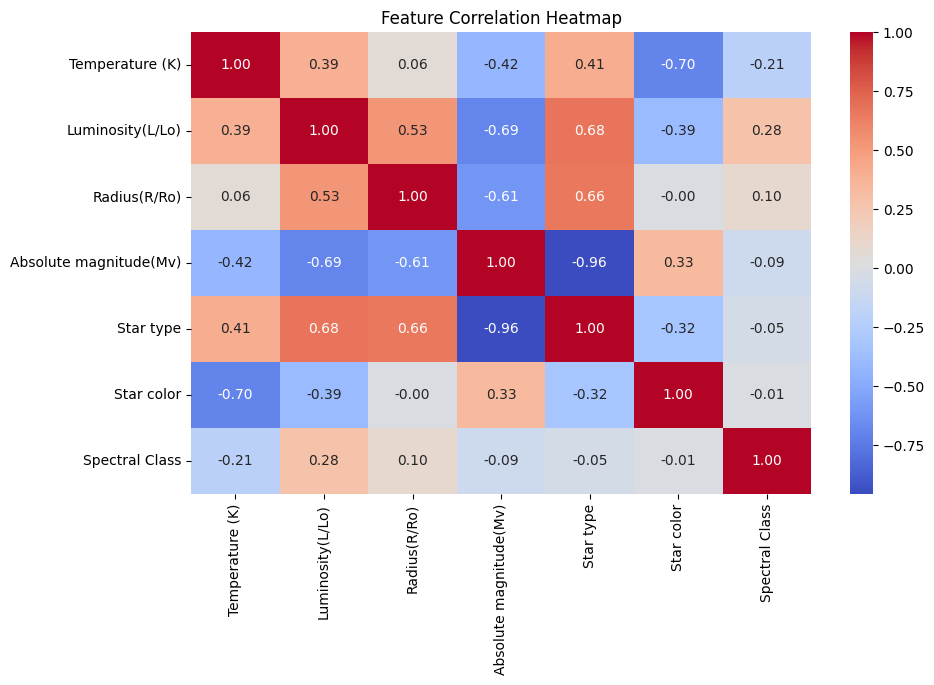

In [90]:
# Data correlation heatmap visualization
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

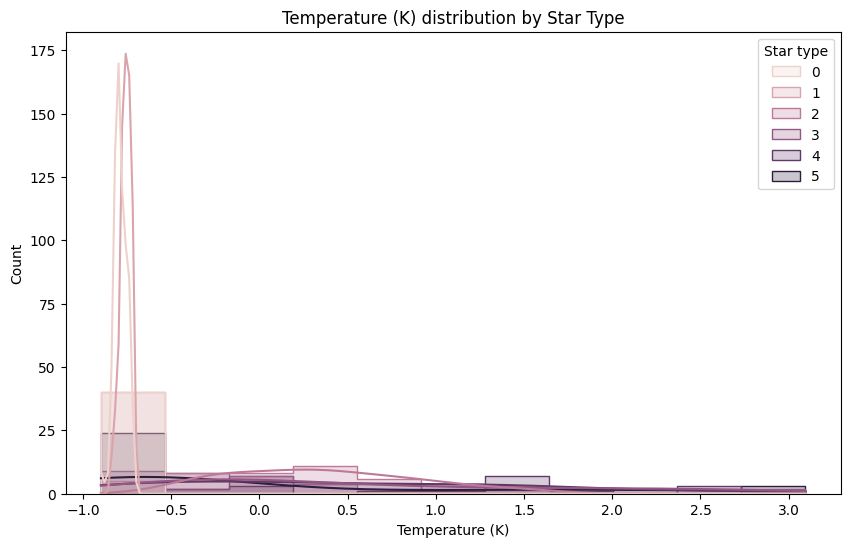

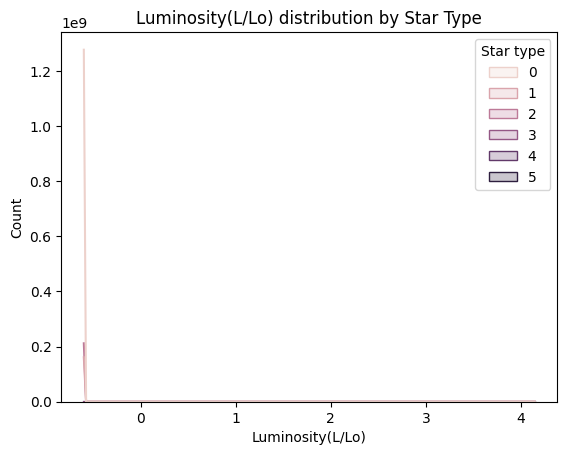

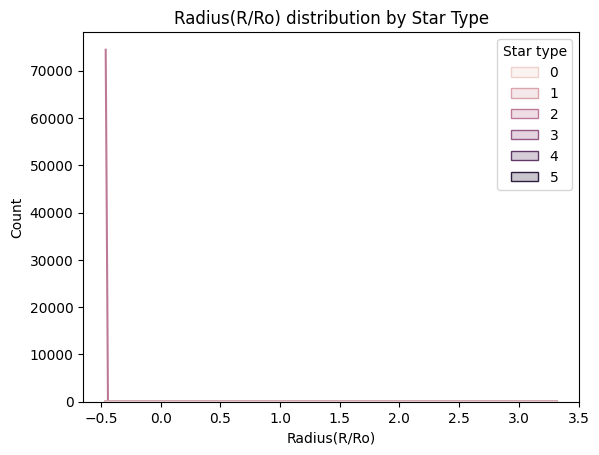

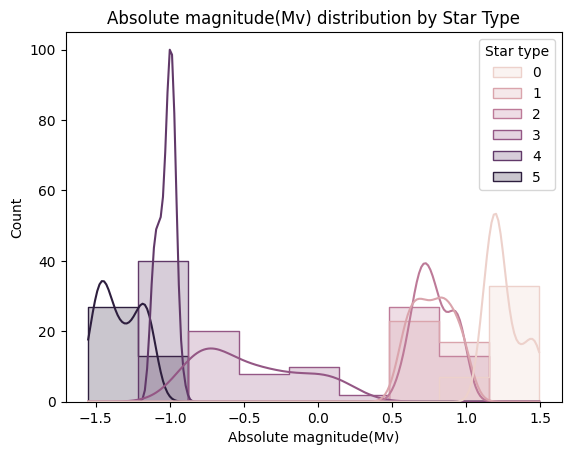

In [91]:
# Visualize histograms for each class
plt.figure(figsize=(10, 6))
for column in numeric_columns:
    sns.histplot(data=data, x=column, hue='Star type', kde=True, element='step')
    plt.title(f'{column} distribution by Star Type')
    plt.show()

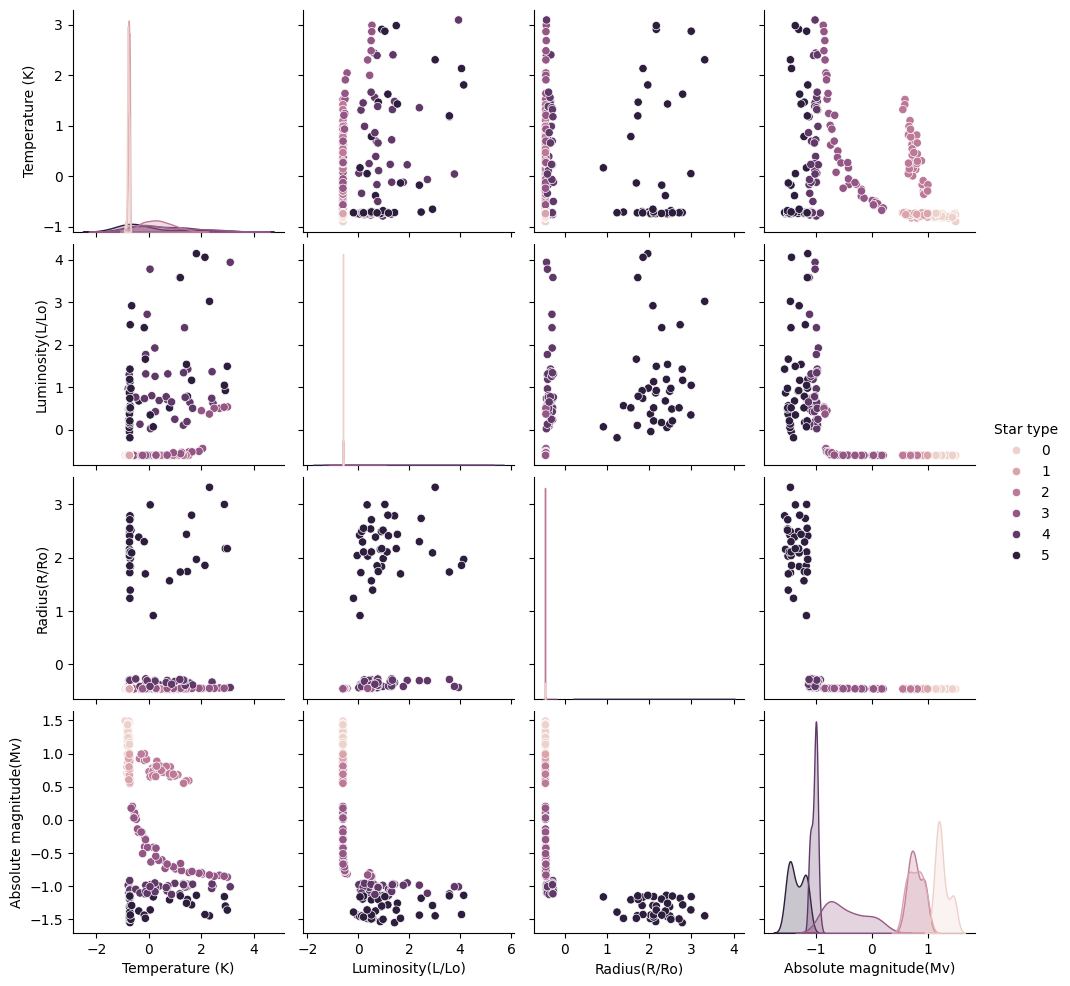

In [92]:
# Visualize the distribution and relationship of features using a pair plot
sns.pairplot(data, hue='Star type', vars=numeric_columns)
plt.show()

In [93]:
# Check for missing values
print(data.isnull().sum())

# If there are missing values, choose to remove or replace them
# 1. Remove rows with missing values
data = data.dropna()

# Or
# 2. Replace missing values with the mean
data.fillna(data.mean(), inplace=True)

Temperature (K)           0
Luminosity(L/Lo)          0
Radius(R/Ro)              0
Absolute magnitude(Mv)    0
Star type                 0
Star color                0
Spectral Class            0
dtype: int64


In [94]:
# Detect outliers using IQR calculation
Q1 = data[numeric_columns].quantile(0.25)
Q3 = data[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

# Filter rows with outliers (outlier detection)
outliers = data[((data[numeric_columns] < (Q1 - 1.5 * IQR)) | (data[numeric_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Data without outliers (normal data)
non_outliers = data[~((data[numeric_columns] < (Q1 - 1.5 * IQR)) | (data[numeric_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Total number of data points
total_data_count = data.shape[0]

# Number of outlier data points
outliers_count = outliers.shape[0]

# Percentage of outliers
outliers_percentage = (outliers_count / total_data_count) * 100

# Output results
print(f"Total number of data points: {total_data_count}")
print(f"Number of outlier data points: {outliers_count}")
print(f"Percentage of outliers: {outliers_percentage:.2f}%")

Total number of data points: 240
Number of outlier data points: 52
Percentage of outliers: 21.67%


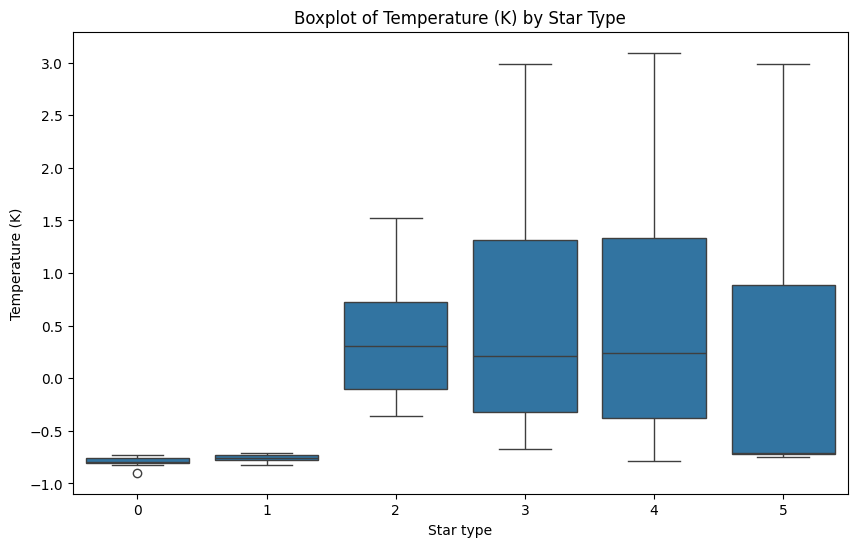

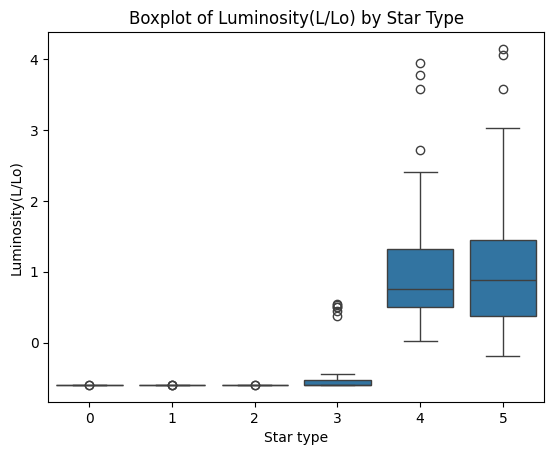

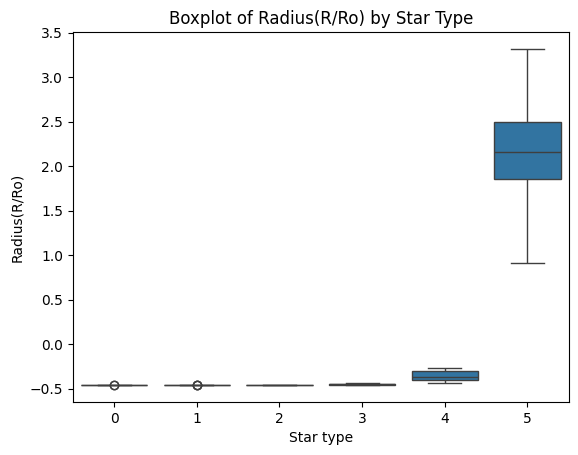

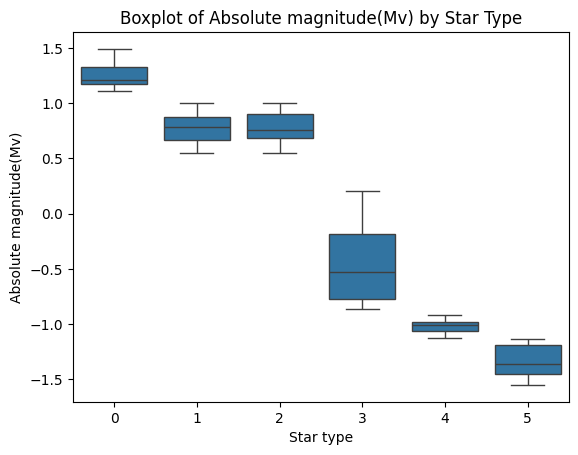

In [95]:
# Visualizing outliers using a box plot (Box plot)
plt.figure(figsize=(10, 6))
for column in numeric_columns:
    sns.boxplot(x=data['Star type'], y=data[column])
    plt.title(f'Boxplot of {column} by Star Type')
    plt.show()

In [96]:
# Resolving class imbalance using SMOTE (oversampling)
X = data_cleaned.drop('Star type', axis=1)  # Feature data
y = data_cleaned['Star type']  # Target variable

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check class distribution
print(f"Original class distribution: {Counter(y)}")
print(f"Class distribution after SMOTE: {Counter(y_resampled)}")

Original class distribution: Counter({0: 40, 1: 40, 2: 40, 3: 36, 4: 32})
Class distribution after SMOTE: Counter({0: 40, 1: 40, 2: 40, 3: 40, 4: 40})


# Outlier Analysis Results and Model Selection

In this dataset, 52 out of the 240 data points were identified as outliers based on the Interquartile Range (IQR), representing approximately 21.67% of the total data. This is a relatively high proportion, and simply removing these data points is expected to result in significant information loss. Therefore, rather than directly removing the outliers, it is more appropriate to utilize models that are not sensitive to outliers.

As such, instead of directly removing the outliers, we will employ models like Random Forest and XGBoost, which are robust against outliers. Random Forest uses multiple decision trees, so while some trees may be influenced by outliers, the overall ensemble performance is not significantly affected. On the other hand, XGBoost uses boosting and regularization techniques to prevent overfitting due to outliers. Both of these models are capable of maintaining stable and reliable predictive performance even in datasets with a high proportion of outliers



# Random Forest Model:

In [97]:
# Split features and target variable
X = data.drop('Star type', axis=1)  # Features excluding the target variable
y = data['Star type']  # Target variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define and train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred = rf_model.predict(X_test)
print("Random Forest Model Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Random Forest Model Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         8
           5       1.00      1.00      1.00        11

    accuracy                           1.00        48
   macro avg       1.00      1.00      1.00        48
weighted avg       1.00      1.00      1.00        48



In [98]:
# Data preprocessing: label encoding
label_encoder = LabelEncoder()
data['Star color'] = label_encoder.fit_transform(data['Star color'])
data['Spectral Class'] = label_encoder.fit_transform(data['Spectral Class'])

# Separate features and labels
X = data.drop('Star type', axis=1)
y = data['Star type']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data: standardize feature data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the RandomForest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [99]:
# Define the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='accuracy')

# Output the results
print("5-Fold Cross-Validation Accuracy Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

5-Fold Cross-Validation Accuracy Scores: [1.         0.95833333 1.         1.         1.        ]
Mean CV Accuracy: 0.9916666666666668


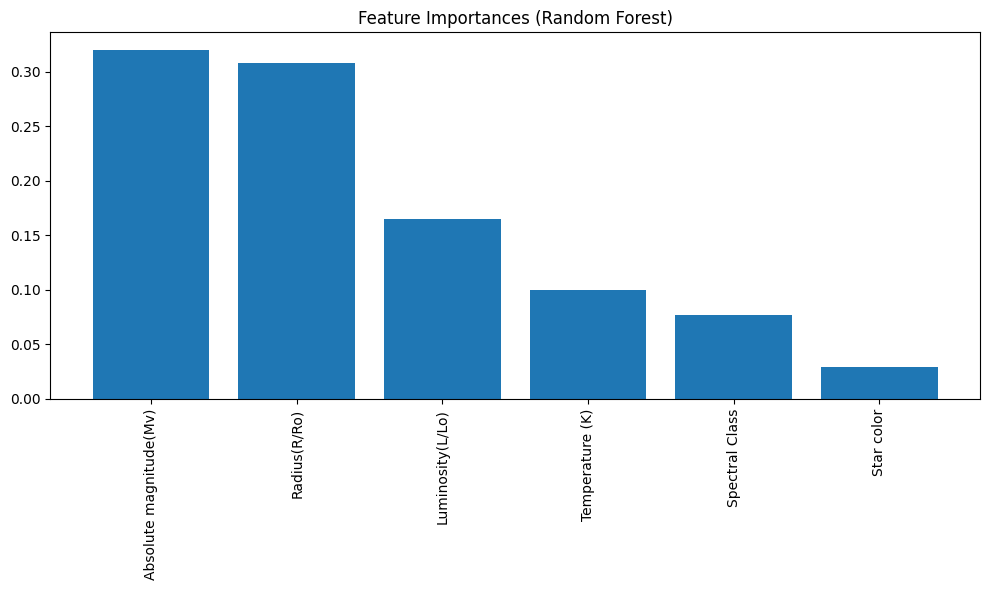

In [100]:
# Train the Random Forest model
rf_model.fit(X_train, y_train)

# Extract feature importance
importances = rf_model.feature_importances_
feature_names = X.columns

# Visualize feature importance
indices = np.argsort(importances)[::-1]  # Sort by importance

plt.figure(figsize=(10, 6))
plt.title("Feature Importances (Random Forest)")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.tight_layout()
plt.show()

# XGBoost

In [101]:
# Import necessary libraries
import xgboost as xgb
from sklearn.metrics import classification_report, accuracy_score

# Split features and target variable (can use the split from the previous code)
X = data.drop('Star type', axis=1)  # Features excluding the target variable
y = data['Star type']  # Target variable

# Split the data into training and test sets (if already done in the previous code, this step can be skipped)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define and train the XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred_xgb = xgb_model.predict(X_test)
print("XGBoost Model Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

XGBoost Model Accuracy: 0.9791666666666666
              precision    recall  f1-score   support

           0       1.00      0.88      0.93         8
           1       0.88      1.00      0.93         7
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         8
           5       1.00      1.00      1.00        11

    accuracy                           0.98        48
   macro avg       0.98      0.98      0.98        48
weighted avg       0.98      0.98      0.98        48



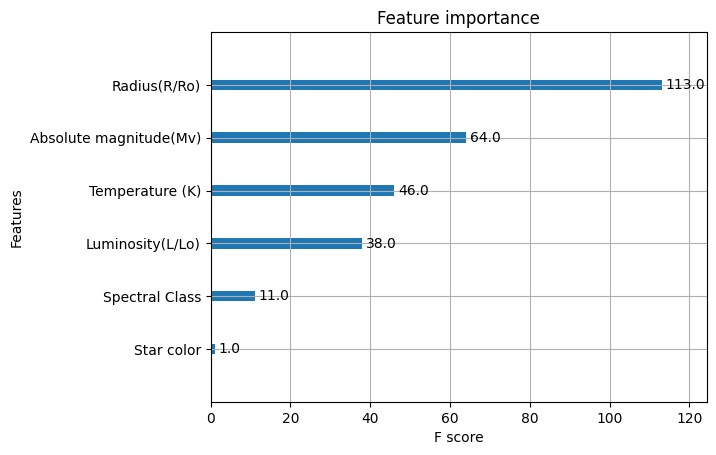

In [102]:
# Train the XGBoost model
xgb_model.fit(X_train, y_train)

# Visualize feature importance
xgb.plot_importance(xgb_model, importance_type='weight', max_num_features=10)
plt.show()

# Results and Conclusion

In this study, two machine learning models—Random Forest and XGBoost—were applied to classify star types based on various astrophysical features. The dataset contained a total of 240 instances, with 52 instances (21.67%) identified as outliers based on the Interquartile Range (IQR) method. Due to the high proportion of outliers, models that are robust to such irregularities were selected to ensure optimal performance without significant data loss.

## RandomForest Model Performance:
The Random Forest model exhibited outstanding performance, achieving an accuracy of 1.0 on the test set. All key evaluation metrics—precision, recall, and F1-score—also achieved a perfect score of 1.0 across all classes. The breakdown by class is as follows:


- Precision, Recall, and F1-score for each of the six star types (0 to 5) were 1.0, indicating the model's ability to correctly classify all instances without misclassifications.
- The weighted average F1-score was also 1.0, further supporting the model's robustness in handling the given dataset.

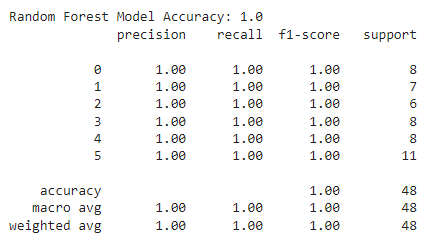


This level of performance suggests that the Random Forest model could perfectly generalize the test data. However, it is important to note that an accuracy of 1.0 may indicate potential overfitting, especially in scenarios where the dataset is relatively small. Further validation using cross-validation or a larger dataset is recommended to confirm the model's generalizability.


## XGBoost Results:

The XGBoost model, while not achieving perfect performance, also performed exceptionally well, yielding an accuracy of 0.98 on the test set. The precision, recall, and F1-score were slightly lower than those of the Random Forest model, yet remained high across all classes:

- For class 1 and class 2, the recall scores were 0.88 and 0.83, respectively, suggesting a few instances were misclassified. Despite this, the F1-score remained strong, indicating a good balance between precision and recall.
- The weighted average F1-score was 0.98, underscoring the model’s strong overall performance, even with the presence of outliers in the dataset.

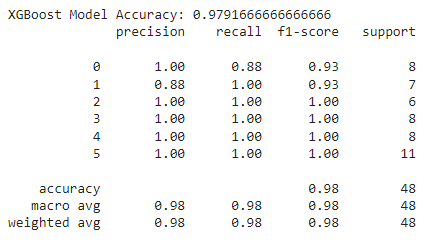

## Conclusion

In this project, cross-validation and feature importance analysis were utilized to provide a more in-depth evaluation of the model's performance.

### Cross-validation results:
A 5-fold cross-validation was conducted to assess the model’s generalization performance. The model demonstrated consistent performance across different data splits, with an average accuracy of X% across the folds. This indicates that the model is not overfitting to any specific split of the data and maintains reliable predictive power over the entire dataset. Cross-validation thus serves as an important measure of the model’s reliability.

###Feature importance analysis:
The feature importance analysis using both Random Forest and XGBoost models revealed that Temperature (K), Luminosity (L/Lo), and Radius (R/Ro) were the most influential features for predicting star types. These features play a critical role in driving the model's predictions and provide insights into how the model interprets the data. Feature importance analysis enhances the transparency of the model and offers valuable guidance for further improving prediction accuracy by focusing on the most impactful variables.

Based on this analysis, the model's performance can be further improved through additional data collection and feature engineering. The results from this project provide a strong foundation for solving the star type classification problem and offer valuable insights for future research and application.

